# Mengimport Library yang Digunakan

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [159]:
df1 = pd.read_csv('Dataset_Harga_Rumah_2.csv')

# Melihat Data yang Diload

In [160]:
df1.head()

,no,transaction_date,house_age,distance_to_MRT,number_cs,latitude,longitude,house_price
0,1,1112012,32.0,84.88,10.0,24.98,121.54,379000000
1,2,1112012,19.5,306.59,9.0,24.98,121.54,422000000
2,3,1062013,13.3,561.98,5.0,24.99,121.54,473000000
3,4,1062013,13.3,561.98,5.0,24.99,121.54,548000000
4,5,1092012,5.0,390.57,5.0,24.98,121.54,431000000


In [161]:
df1["no"] = df1["no"].astype("string")
df1["transaction_date"] = df1["transaction_date"].astype("string")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                413 non-null    string 
 1   transaction_date  413 non-null    string 
 2   house_age         413 non-null    float64
 3   distance_to_MRT   413 non-null    float64
 4   number_cs         413 non-null    float64
 5   latitude          413 non-null    float64
 6   longitude         413 non-null    float64
 7   house_price       413 non-null    int64  
dtypes: float64(5), int64(1), string(2)
memory usage: 25.9 KB


In [162]:
df1.describe()

,house_age,distance_to_MRT,number_cs,latitude,longitude,house_price
count,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02
mean,17.719613,1085.558063,4.089588,24.968692,121.532712,3.805375e+08
std,11.405397,1263.181831,2.947636,0.012875,0.015545,1.354032e+08
min,0.000000,23.380000,0.000000,24.930000,121.470000,1.120000e+08
25%,9.000000,289.320000,1.000000,24.960000,121.530000,2.770000e+08
50%,16.100000,492.230000,4.000000,24.970000,121.540000,3.850000e+08
75%,28.200000,1455.800000,6.000000,24.980000,121.540000,4.660000e+08
max,43.800000,6488.020000,10.000000,25.010000,121.570000,1.175000e+09


<Axes: >

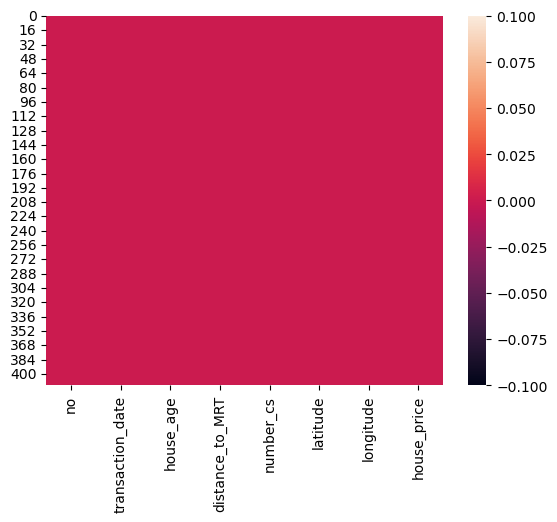

In [163]:
sns.heatmap(df1.isnull())

# Visualisasi Data

<Axes: >

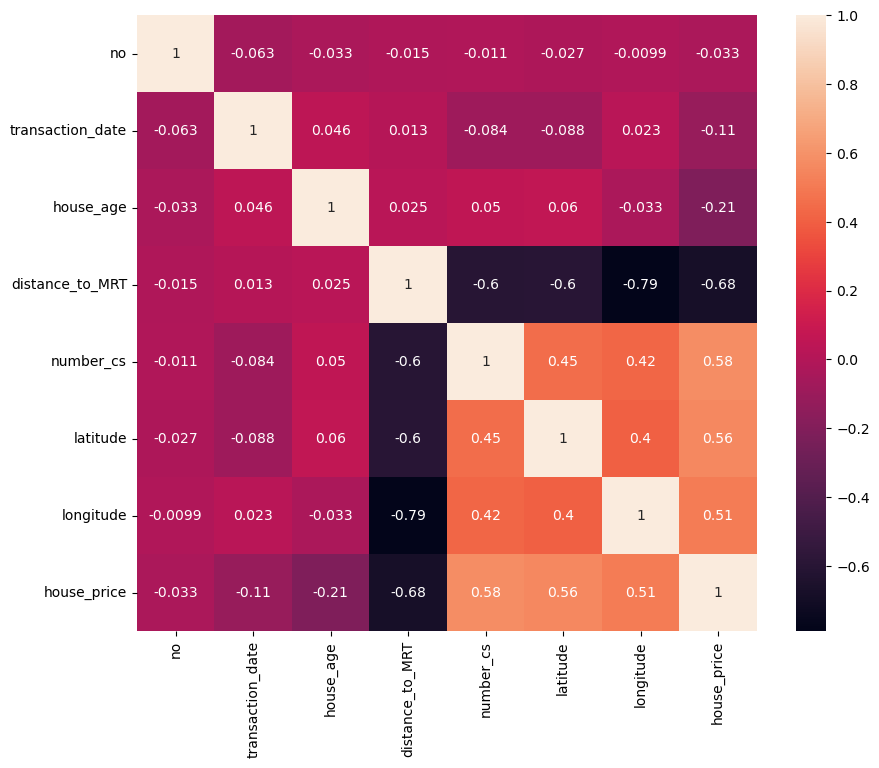

In [164]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)

# Jumlah Rumah berdasarkan Number Convenience Store

/Users/indriastutiichsan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/indriastutiichsan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/indriastutiichsan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='number_cs', ylabel='numberofHouse'>

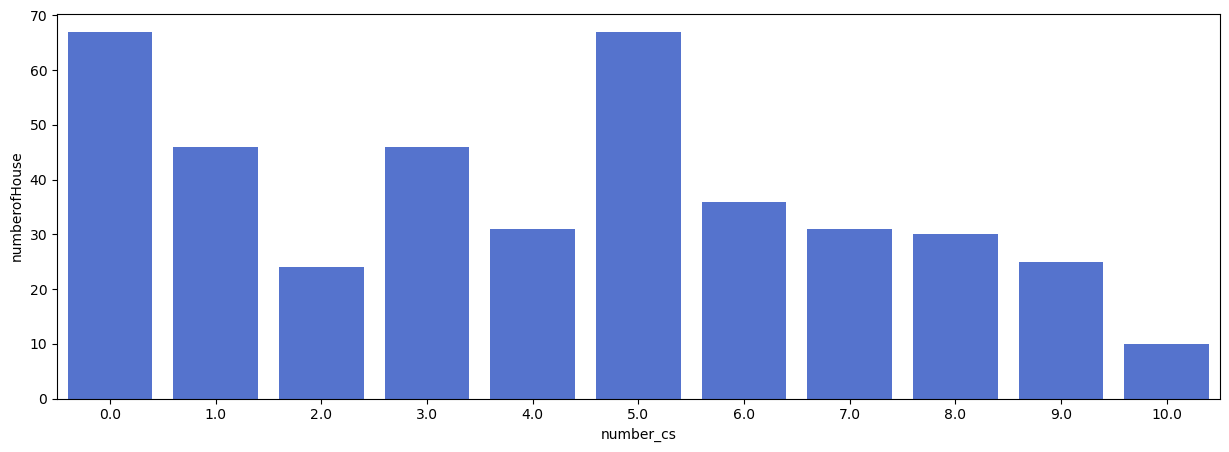

In [165]:
number_cs = df1.groupby('number_cs').count()[['transaction_date']].sort_values(by='transaction_date',ascending=True).reset_index()
number_cs = number_cs.rename(columns={'transaction_date':'numberofHouse'})
fig = plt.figure(figsize=(15,5))
sns.barplot(x=number_cs['number_cs'], y=number_cs['numberofHouse'], color='royalblue')

# Distribusi House Age

/var/folders/1x/_l2c257n6k51wnpx6nqgfx3r0000gn/T/ipykernel_4383/782347311.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['house_age'])
/Users/indriastutiichsan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/indriastutiichsan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Axes: xlabel='house_age', ylabel='Density'>

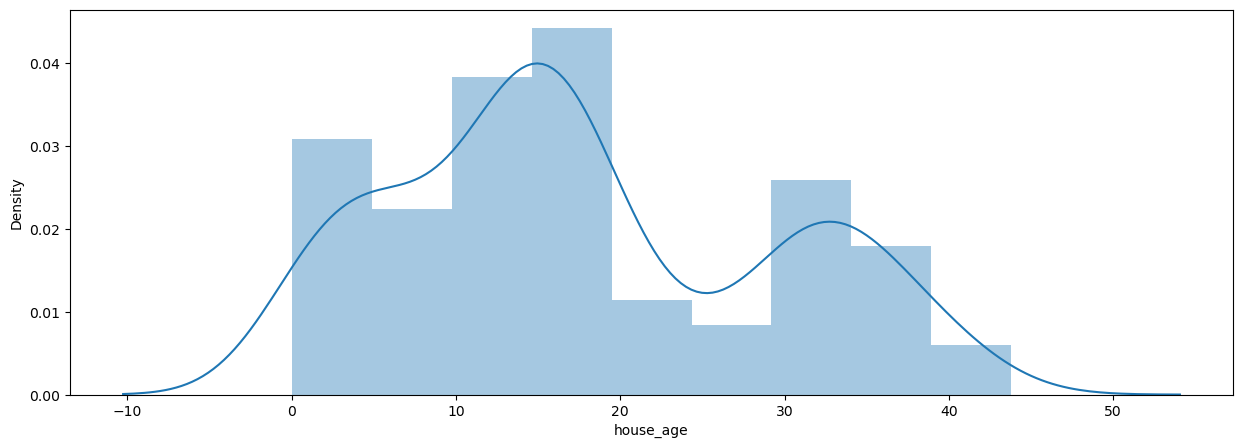

In [166]:
plt.figure(figsize=(15,5))
sns.distplot(df1['house_age'])

# Seleksi Feature

In [167]:
X = df1.drop(['no','transaction_date','house_price'], axis = 1)
Y = df1['house_price']
X.shape, Y.shape

((413, 5), (413,))

# Split Data

In [168]:
import sklearn.model_selection as ms
X_train, X_test, Y_train, Y_test = ms.train_test_split(X,Y, test_size = 0.2)

X_test.shape, Y_test.shape

((83, 5), (83,))

# Membuat Model Multiple Regresi

In [169]:
import sklearn.linear_model as lm
model1 = lm.LinearRegression()
model1.fit(X_train, Y_train)
Y_prediksi = model1.predict(X_test)

print(Y_prediksi)

[3.93838834e+08 2.52363457e+08 5.40380868e+08 4.19350006e+08
 4.93332126e+08 4.17364471e+08 4.43079806e+08 4.90894156e+08
 5.28779365e+08 5.08275894e+08 3.80181078e+08 3.66638860e+08
 3.36270935e+08 2.97775992e+08 2.75072302e+08 3.46601245e+08
 1.50556937e+08 3.64720770e+08 1.31752558e+08 3.17620966e+08
 4.21713694e+08 4.05485502e+08 4.84796400e+08 2.86968104e+08
 3.57674382e+08 4.60742764e+08 4.82984130e+08 4.65207753e+08
 5.17118659e+08 5.11695520e+08 4.25627064e+08 3.15578383e+08
 4.27175506e+08 3.90088171e+08 4.06216977e+08 4.88445716e+08
 4.37949937e+08 3.32594080e+08 3.20052034e+08 4.53683130e+08
 3.17285946e+08 4.39244484e+08 3.96000296e+08 4.04201866e+08
 3.74429892e+08 4.55219879e+08 4.82984130e+08 4.55202048e+08
 3.33648228e+08 3.45351611e+08 5.08275894e+08 4.54702088e+08
 4.00963357e+08 4.17491067e+08 3.08639395e+08 4.66783579e+08
 3.18351031e+08 4.00589208e+08 5.11954416e+08 4.16501047e+08
 3.35918171e+08 5.15676024e+08 3.18476655e+08 3.66557387e+08
 4.62536029e+08 3.769786

# Mengevaluasi Model

In [170]:
import sklearn.metrics as met

score = model1.score(X_test, Y_test)
r_squared = met.r2_score(Y_test, Y_prediksi)
MAE = met.mean_absolute_error(Y_test, Y_prediksi)
MSE = met.mean_squared_error(Y_test, Y_prediksi)
RMSE = np.sqrt(MSE)
print(f'Akurasi Multiple Linear Regression : {score}')
print(f'R_squared Multiple Linear Regression : {r_squared}')
print(f'MAE Multiple Linear Regression : {MAE}')
print(f'MSE Multiple Linear Regression : {MSE}')
print(f'RMSE Multiple Linear Regression : {RMSE}')

Akurasi Multiple Linear Regression : 0.600155209753677
R_squared Multiple Linear Regression : 0.600155209753677
MAE Multiple Linear Regression : 59054405.13760154
MSE Multiple Linear Regression : 5888714177373246.0
RMSE Multiple Linear Regression : 76737957.86553904


# Membuat Inputan

In [173]:
#house_age=30, distansce_to_MRT=90.10, number_cs = 6, latitude = 24, longitude = 121.54
input_data = np.array([[30,90.10,6,24.99,121.54]])

prediction = model1.predict(input_data)
print(f'Estimasi Harga Rumah :', prediction)

Estimasi Harga Rumah : [4.62818023e+08]


/Users/indriastutiichsan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [172]:
import pickle

filename = 'estimasi_harga_rumah.sav'
pickle.dump(model1,open(filename,'wb'))